# Biding and Impression Analysis

Data example: ipinyou/training1st/bid.20130311

## ML Pipeline

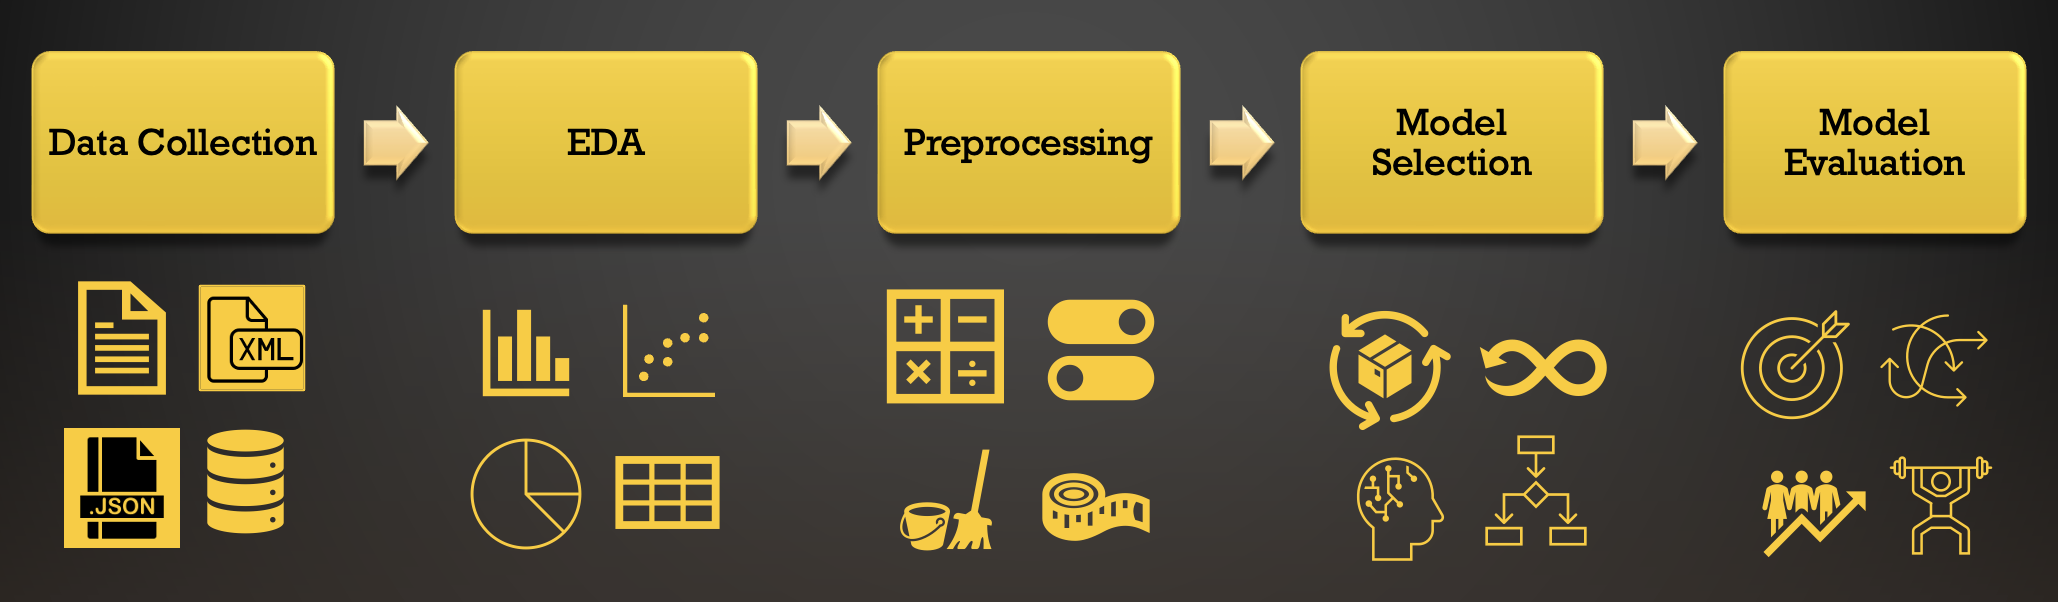

## Enviroment Preparation

In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install sklearn

     |████████████████████████████████| 14.0 MB 1.3 MB/s eta 0:00:01
You should consider upgrading via the '/Users/nelsondressler/Documents/RTB_Sonntag/programmatic_challenge/venv/bin/python3 -m pip install --upgrade pip' command.
     |████████████████████████████████| 10.8 MB 3.2 MB/s eta 0:00:01
  Using cached pytz-2023.3-py2.py3-none-any.whl (502 kB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
You should consider upgrading via the '/Users/nelsondressler/Documents/RTB_Sonntag/programmatic_challenge/venv/bin/python3 -m pip install --upgrade pip' command.
  Using cached matplotlib-3.7.1-cp310-cp310-macosx_11_0_arm64.whl (7.3 MB)
  Using cached Pillow-10.0.0-cp310-cp310-macosx_11_0_arm64.whl (3.1 MB)
  Using cached contourpy-1.1.0-cp310-cp310-macosx_11_0_arm64.whl (229 kB)
  Using cached fonttools-4.40.0-cp310-cp310-macosx_10_9_universal2.whl (2.6 MB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached pyparsing-3.1.0-py3-none-any.whl (102 kB)
  Using c

In [2]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Data Parameters

In [3]:
project_path = os.path.dirname(os.getcwd())
data_folder = 'data'
data_file_name = 'bid.20130311.txt.bz2'
file_path = os.path.join(project_path, data_folder, data_file_name)

file_path

'/Users/nelsondressler/Documents/RTB_Sonntag/programmatic_challenge/data/bid.20130311.txt.bz2'

In [4]:
bid_columns = [
    "BidID", 
    "Timestamp",  
    "iPinYouID",
    "UserAgent",
    "IP", 
    "RegionID",  
    "CityID", 
    "AdExchange",
    "Domain",  
    "URL",
    "AnonymousURL",
    "AdSlotID",
    "AdSlotWidth",
    "AdSlotHeight",
    "AdSlotVisibility",
    "AdSlotFormat",
    "AdSlotFloorPrice",
    "CreativeID",
    "BiddingPrice",
    "AdvertiserID",  # V
    "UserProfileIDs"
]

bid_columns

['BidID',
 'Timestamp',
 'iPinYouID',
 'UserAgent',
 'IP',
 'RegionID',
 'CityID',
 'AdExchange',
 'Domain',
 'URL',
 'AnonymousURL',
 'AdSlotID',
 'AdSlotWidth',
 'AdSlotHeight',
 'AdSlotVisibility',
 'AdSlotFormat',
 'AdSlotFloorPrice',
 'CreativeID',
 'BiddingPrice',
 'AdvertiserID',
 'UserProfileIDs']

## Data Collection

In [5]:
bid_df = pd.read_csv(
    file_path,
    compression='bz2',
    sep='\t',
    header=None,
    names=bid_columns
)

In [6]:
bid_df.head()

,BidID,Timestamp,iPinYouID,UserAgent,IP,RegionID,CityID,AdExchange,Domain,URL,...,AdSlotID,AdSlotWidth,AdSlotHeight,AdSlotVisibility,AdSlotFormat,AdSlotFloorPrice,CreativeID,BiddingPrice,AdvertiserID,UserProfileIDs
0,e3d962536ef3ac7096b31fdd1c1c24b0,20130311172101557,37a6259cc0c1dae299a7866489dff0bd,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,219.232.120.*,1,1,2,DF9blS9bQqsIFYB4uA5R,b6c5272dfc63032f659be9b786c5f8da,...,2006366309,728,90,1,0,5,5aca4c5f29e59e425c7ea657fdaac91e,300,NaN,NaN
1,f2ce7b51f499eae08ae66a31c1d7c1f,20130311172101567,37a6259cc0c1dae299a7866489dff0bd,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,60.220.37.*,15,19,2,trqRTJLILec7gspy5SqW,2244fa274b2900c2d8113c982cdf41d1,...,3572180553,728,90,2,0,5,5aca4c5f29e59e425c7ea657fdaac91e,300,NaN,NaN
2,dabbf5f389089c39d6c3d22eba32e5c3,20130311172101568,37a6259cc0c1dae299a7866489dff0bd,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,115.214.175.*,94,96,2,trqRTuMvjTN7X9KbuKz,36bfe780a62baad0765baf160960aef4,...,1397763044,300,250,0,0,59,f206493d1a82b7d977075b20b7afd5f4,300,NaN,NaN
3,55cc617434cd0796374c1ca64288f8e9,20130311172101571,37a6259cc0c1dae299a7866489dff0bd,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,223.88.226.*,0,0,2,trqRTud0B9c7gspy5SqW,bc442d12875e654999869c981197b1b,...,2673407723,160,600,2,0,5,36391fa23e0928a93cd51ea8af344b82,300,NaN,NaN
4,68859f0ea7e3578ed57b751c59e1f547,20130311172101575,454e2cbacd2a82f8642637f2fc36578d,Mozilla/4.0 (compatible; MSIE 7.0; Windows NT ...,218.1.106.*,79,79,2,trqRTJdujTNv1m58uG,79189c40fe660a9d576a49ce23fb978c,...,1540696294,300,250,2,0,5,f206493d1a82b7d977075b20b7afd5f4,300,NaN,NaN


## EDA

### Data Details

In [7]:
bid_df.shape

(1692625, 21)

In [8]:
bid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692625 entries, 0 to 1692624
Data columns (total 21 columns):
 #   Column            Dtype  
---  ------            -----  
 0   BidID             object 
 1   Timestamp         int64  
 2   iPinYouID         object 
 3   UserAgent         object 
 4   IP                object 
 5   RegionID          int64  
 6   CityID            int64  
 7   AdExchange        int64  
 8   Domain            object 
 9   URL               object 
 10  AnonymousURL      object 
 11  AdSlotID          object 
 12  AdSlotWidth       int64  
 13  AdSlotHeight      int64  
 14  AdSlotVisibility  int64  
 15  AdSlotFormat      int64  
 16  AdSlotFloorPrice  int64  
 17  CreativeID        object 
 18  BiddingPrice      int64  
 19  AdvertiserID      float64
 20  UserProfileIDs    float64
dtypes: float64(2), int64(10), object(9)
memory usage: 271.2+ MB


In [9]:
bid_df[["AdSlotID", "AdSlotWidth", "AdSlotHeight", "AdSlotVisibility", "AdSlotFormat", "AdSlotFloorPrice"]]

,AdSlotID,AdSlotWidth,AdSlotHeight,AdSlotVisibility,AdSlotFormat,AdSlotFloorPrice
0,2006366309,728,90,1,0,5
1,3572180553,728,90,2,0,5
2,1397763044,300,250,0,0,59
3,2673407723,160,600,2,0,5
4,1540696294,300,250,2,0,5
...,...,...,...,...,...,...
1692620,Sports_F_Rectangle,300,250,0,0,50
1692621,Sports_F_Upright,300,250,0,0,10
1692622,Sports_F_Width1,1000,90,0,0,20
1692623,Sports_F_Rectangle,300,250,0,0,50


### Missing Values

In [10]:
bid_df.isnull().sum() / bid_df.shape[0]

BidID               0.000000
Timestamp           0.000000
iPinYouID           0.084160
UserAgent           0.000234
IP                  0.000097
RegionID            0.000000
CityID              0.000000
AdExchange          0.000000
Domain              0.068296
URL                 0.000308
AnonymousURL        0.932013
AdSlotID            0.000000
AdSlotWidth         0.000000
AdSlotHeight        0.000000
AdSlotVisibility    0.000000
AdSlotFormat        0.000000
AdSlotFloorPrice    0.000000
CreativeID          0.000000
BiddingPrice        0.000000
AdvertiserID        1.000000
UserProfileIDs      1.000000
dtype: float64

## Next Steps

TODO list: based on the 2_OpenRTB_EMR.ipynb, do the following steps:
- continue to explore and understand the data collected (distributions, outliers, patters, correlations, ...)
- collect other data related to this example
- do the data integration
- do the preprocessing
- create a new preprocessed dataframe